# LR API

In [7]:
from sklearn.linear_model import LinearRegression

x = [[160],[166],[172],[174],[180]]
y = [56.3,60.6,65.1,68.5,75]

model = LinearRegression()
model.fit(x ,y)

print(model.coef_)
print(model.intercept_)

print(model.predict([[176]]))

[0.92942177]
-93.27346938775517
[70.3047619]


# Boston 房价预测

In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import mean_squared_error

# 加载数据
housing = fetch_california_housing()
print(housing)
x = housing.data
y = housing.target

# 数据集切分
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# 数据标准化
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 线性回归模型
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pre = lin_reg.predict(x_test)
mse_lin = mean_squared_error(y_test, y_pre)
print(f'线性回归MSE：{mse_lin:.2f}')

# 梯度下降回归模型
sgd_reg = SGDRegressor()
sgd_reg.fit(x_train, y_train)
y_pred = sgd_reg.predict(x_test)
mse_sgd = mean_squared_error(y_test, y_pred)
print(f'梯度下降回归MSE：{mse_sgd:.2f}')

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

# 拟合效果

## 欠拟合

[-1.74923678 -0.10991363 -0.47677179  2.15509199 -1.97303068 -0.96681624
 -1.376803    1.1462481  -1.6775729   1.87170552 -2.93683875  0.36722218
  1.88235712  1.47060178 -1.86533187 -2.9631548   1.63226323  2.74699301
  1.2116273  -1.2145304   1.60795645  1.12930995 -0.67689912  0.69123495
 -0.43466856  0.50573786  1.21581311 -2.32862897  2.53961956  2.93331764
  1.06446464  1.77098865 -2.8255419  -1.93344557  2.24956647  1.46959246
  0.04854098 -2.22999659 -0.09429457  0.09464093 -1.13241202 -2.72603074
 -0.37391604 -2.42469234 -2.72873933  1.10897231  2.09514447 -2.2487569
 -2.22561596 -0.16163999 -1.81464895  1.68973649  0.64448318 -0.33899943
  2.89217465  1.25373248 -1.68761751 -1.99507021  0.23259284 -1.11947527
  2.46922198 -2.48246592 -1.11555582 -1.68517583  1.41999738  1.97124219
  1.46738678 -1.93477777  2.15071918 -2.96692553 -0.85414098  2.71888949
  2.65065832 -2.86170592  1.03809598 -2.015314    0.40879422 -1.54726226
 -2.05286451  0.02137693  0.43077088 -0.18028552  0.

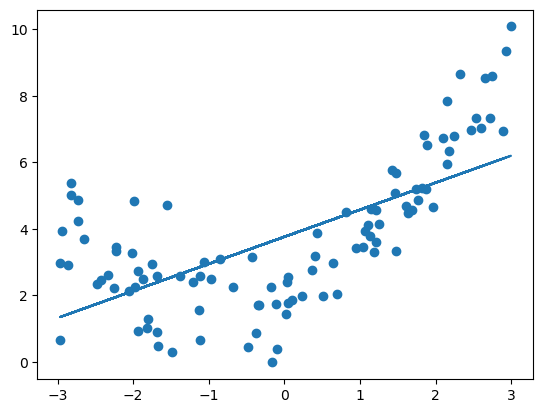

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

np.random.seed(22)
x = np.random.uniform(-3, 3, size = 100)
print(x)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)
print(y)

model = LinearRegression()
X = x.reshape(-1, 1)
model.fit(X, y)

y_pre = model.predict(X)
print(mean_squared_error(y, y_pre))

plt.scatter(x, y)
plt.plot(x, y_pre)
plt.show()

## 正好拟合

[-1.74923678 -0.10991363 -0.47677179  2.15509199 -1.97303068 -0.96681624
 -1.376803    1.1462481  -1.6775729   1.87170552 -2.93683875  0.36722218
  1.88235712  1.47060178 -1.86533187 -2.9631548   1.63226323  2.74699301
  1.2116273  -1.2145304   1.60795645  1.12930995 -0.67689912  0.69123495
 -0.43466856  0.50573786  1.21581311 -2.32862897  2.53961956  2.93331764
  1.06446464  1.77098865 -2.8255419  -1.93344557  2.24956647  1.46959246
  0.04854098 -2.22999659 -0.09429457  0.09464093 -1.13241202 -2.72603074
 -0.37391604 -2.42469234 -2.72873933  1.10897231  2.09514447 -2.2487569
 -2.22561596 -0.16163999 -1.81464895  1.68973649  0.64448318 -0.33899943
  2.89217465  1.25373248 -1.68761751 -1.99507021  0.23259284 -1.11947527
  2.46922198 -2.48246592 -1.11555582 -1.68517583  1.41999738  1.97124219
  1.46738678 -1.93477777  2.15071918 -2.96692553 -0.85414098  2.71888949
  2.65065832 -2.86170592  1.03809598 -2.015314    0.40879422 -1.54726226
 -2.05286451  0.02137693  0.43077088 -0.18028552  0.

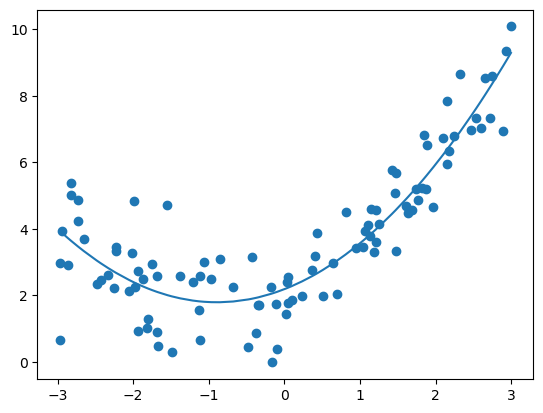

In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 1.准备数据
np.random.seed(22)
x = np.random.uniform(-3, 3, size=100)
print(x)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)
print(y)
# 2.模型训练
model = LinearRegression()
X = x.reshape(-1,1)
X2 = np.hstack([X,X**2])
model.fit(X2,y)

# 3.模型预测
y_predict  = model.predict(X2)
print(mean_squared_error(y_true=y,y_pred=y_predict))
# 4.展示效果
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)])
plt.show()

## 过拟合

0.8224476141915641


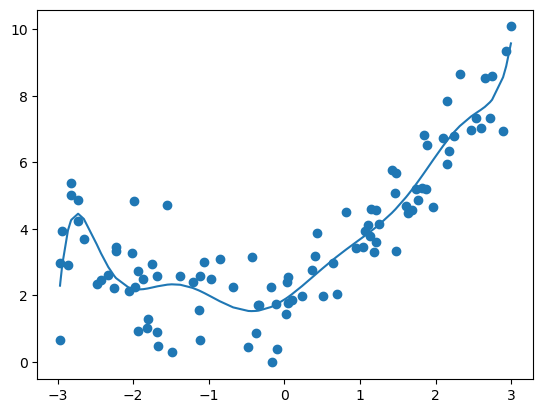

In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 1.准备数据
np.random.seed(22)
x = np.random.uniform(-3, 3, size=100)
#print(x)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)
# print(y)
# 2.模型训练
model = LinearRegression()
X = x.reshape(-1, 1)
X3 = np.hstack([X, X**2, X**3,X**4,X**5,X**6,X**7,X**9,X**10])
model.fit(X3, y)

# 3.模型预测
y_predict  = model.predict(X3)
print(mean_squared_error(y_true=y,y_pred=y_predict))
# 4.展示效果
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)])
plt.show()

## L1正则化

[ 2.68230387e-01  2.17826117e-01  3.65595593e-01  7.28745107e-02
 -4.14761830e-02 -1.80435345e-03 -5.28230167e-03  7.29378060e-04
 -5.27239512e-05]
0.94157770743677


D:\Software\envs\TYPC\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.023e+01, tolerance: 4.835e-02
  model = cd_fast.enet_coordinate_descent(


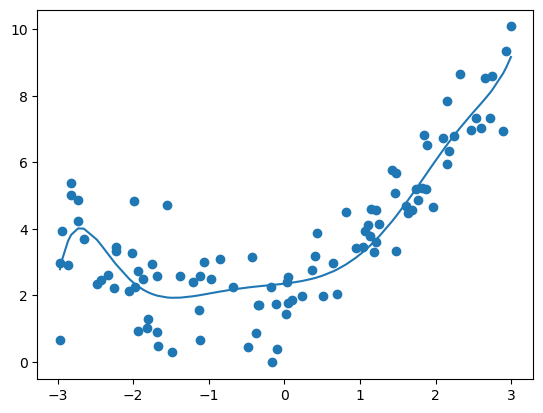

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 1.准备数据
np.random.seed(22)
x = np.random.uniform(-3, 3, size=100)
#print(x)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)
# print(y)

# 2.模型训练
model = Lasso(alpha = 0.1)
X = x.reshape(-1, 1)
X3 = np.hstack([X, X**2, X**3, X**4,X**5,X**6,X**7,X**9,X**10])
model.fit(X3, y)
print(model.coef_)

# 模型预测
y_pre = model.predict(X3)
print(mean_squared_error(y, y_pre))

# 展示效果
plt.scatter(x, y)
plt.plot(np.sort(x), y_pre[np.argsort(x)])
plt.show()

## L2正则化

[ 1.41372496e+00  1.24305713e+00 -9.90023788e-01 -3.35689918e-01
  4.82122518e-01  4.60105075e-02 -8.41885140e-02  4.75191054e-03
 -2.35177926e-04]
0.8227587479761834


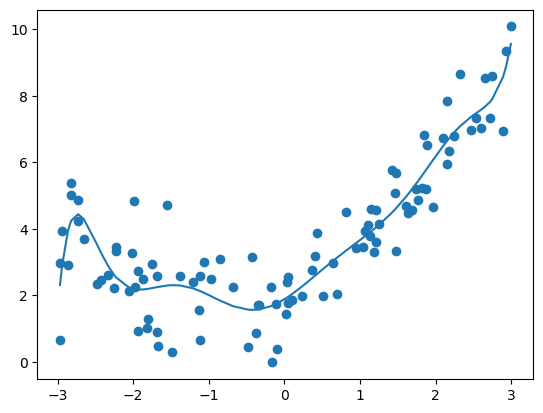

In [13]:
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 1.准备数据
np.random.seed(22)
x = np.random.uniform(-3, 3, size=100)
#print(x)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)
# print(y)
# 2.模型训练
model = Ridge(alpha = 0.1)
X = x.reshape(-1, 1)
X3 = np.hstack([X, X**2, X**3,X**4,X**5,X**6,X**7,X**9,X**10])
model.fit(X3, y)
print(model.coef_)

# 3.模型预测
y_predict  = model.predict(X3)
print(mean_squared_error(y_true=y,y_pred=y_predict))
# 4.展示效果
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)])
plt.show()